# How well do jobs and skills pay for Data Analysts?
## Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills
## Original Exploration
- 18_Matplotlib_Box_Plots.ipynb
- 19_Exercise_Skill_Pay_Analysis.ipynb

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

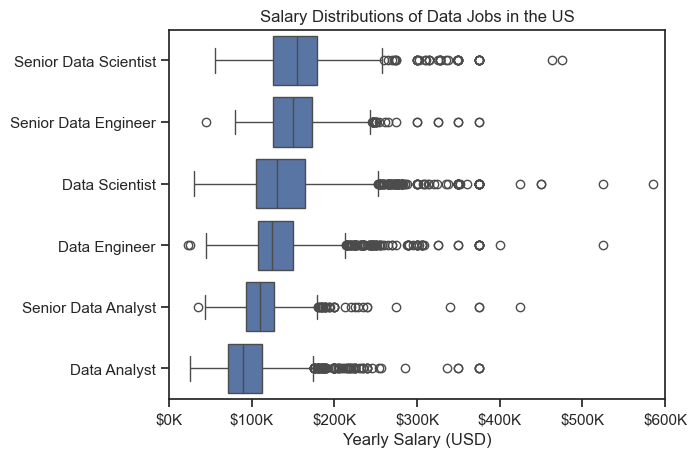

In [3]:
from matplotlib.ticker import StrMethodFormatter
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

top_6_job_titles = df_US[df_US['job_title_short'].isin(job_titles)]
job_order = top_6_job_titles.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

sns.set_theme(style='ticks')
sns.despine()
sns.boxplot(data=top_6_job_titles, y='job_title_short', x='salary_year_avg', order=job_order)
plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


In [ ]:
df_da_US = df_US[df_US['job_title_short']== 'Data Analyst']

df_da_US = df_da_US.explode('job_skills')

da_us_skills = df_da_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

da_us_skills = da_us_skills.head(10)


da_us_top_pay = df_da_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
da_us_top_pay = da_us_top_pay.head(10)

In [26]:
da_us_skills

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


In [27]:
da_us_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


/var/folders/y6/0qzxmvxs4tj502z8bfcn0gy00000gn/T/ipykernel_79609/3940211803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='job_skills', x='median', data=da_us_top_pay, ax=ax[0], palette='dark:r')
/var/folders/y6/0qzxmvxs4tj502z8bfcn0gy00000gn/T/ipykernel_79609/3940211803.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='job_skills', x='median', data=da_us_skills, ax=ax[1], palette='dark:b')


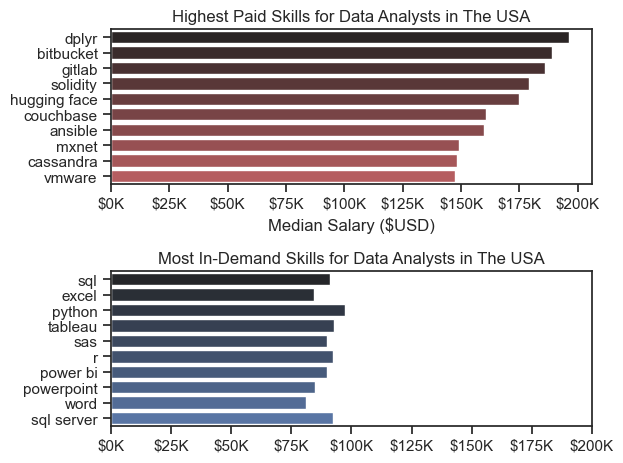

In [32]:
fig, ax = plt.subplots(2, 1)  


sns.barplot(y='job_skills', x='median', data=da_us_top_pay, ax=ax[0], palette='dark:r')
ax[0].set_title('Highest Paid Skills for Data Analysts in The USA')
ax[0].set_ylabel('')
ax[0].set_xlabel('Median Salary ($USD)')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(y='job_skills', x='median', data=da_us_skills, ax=ax[1], palette='dark:b')
ax[1].set_title('Most In-Demand Skills for Data Analysts in The USA')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


plt.xlim(0,200000)
plt.tight_layout()
plt.show()